# <font color='dark'>**Seleção e agrupamento de dados com pandas**</font>

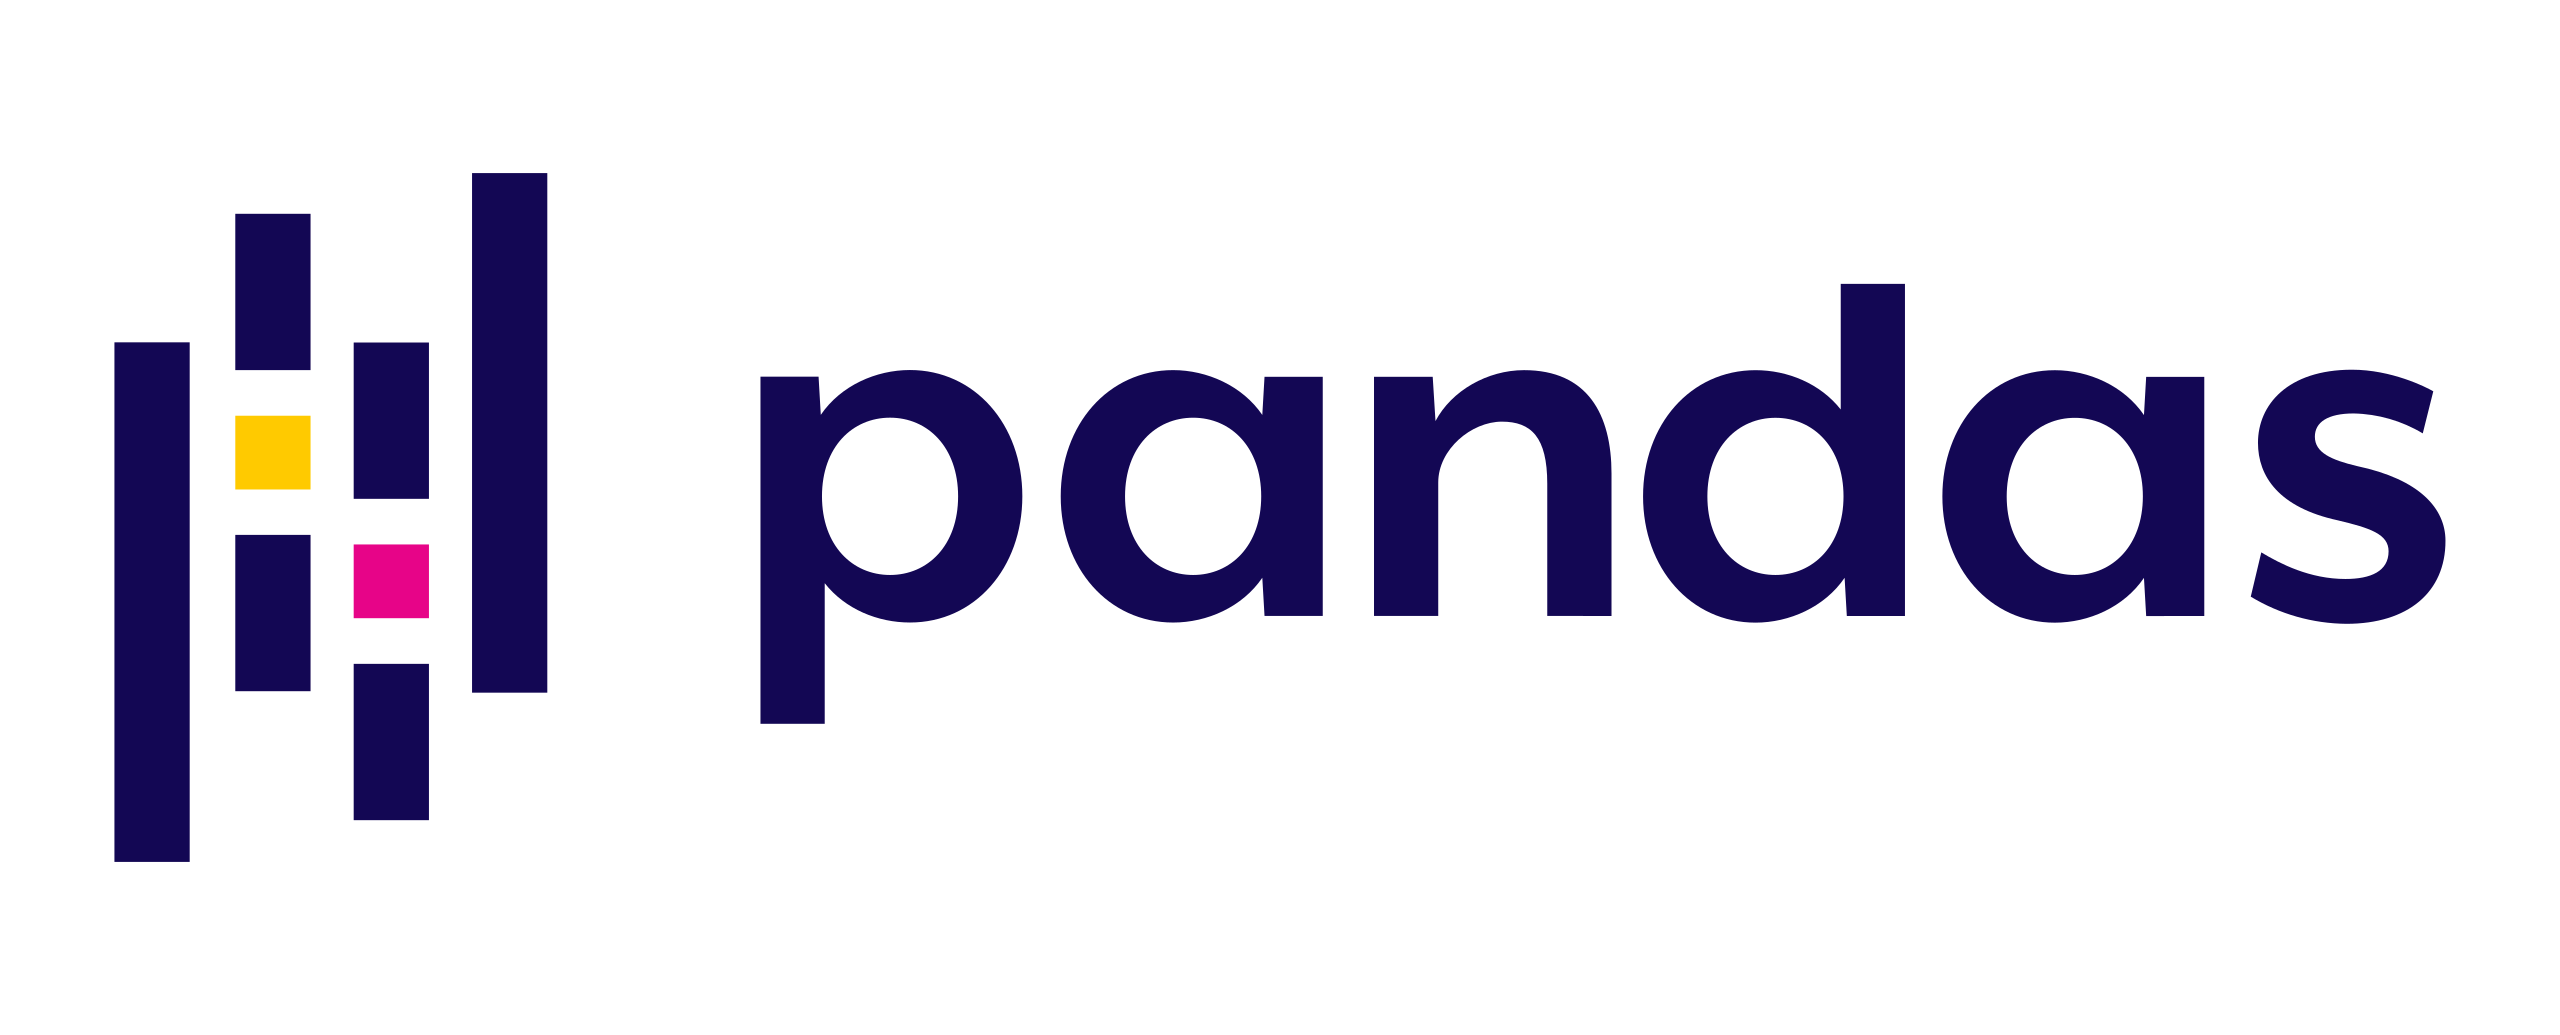

### Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](http://seeg.eco.br/download)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
import pandas as pd


In [2]:
path = 'in/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx'
print(pd.ExcelFile(path).sheet_names)

sheet_name = 'GEE Estados' # Para esse projeto usaremos a tabela de GEE Estados!


['LEIA ANTES', 'HISTÓRICO DE VERSOES', 'GEE Brasil', 'GEE Estados', 'CONSULTA BRASIL', 'CONSULTA ESTADOS', 'CONSULTA ATIV ECONOMICA', 'Arvore Hierarquica', 'GWP e GTP', 'Gases Por Setor', 'Estados', 'Atividade Economica', 'Produto']


In [3]:
gee_estados = pd.read_excel(path, sheet_name)
gee_estados.head()


/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

Esse método é útil para termos uma primeira análise das colunas presentes no DataFrame, principalmente quando ainda não sabemos sobre os dados presentes.

In [4]:
gee_estados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
ℹ
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão*
- *NCI são dados não contemplados no inventário nacional*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas*

---

In [5]:
gee_estados['Emissão / Remoção / Bunker'].unique()


array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

Ou seja, se todos os dados são negativos (por se tratarem da retirada de gases).

In [6]:
(gee_estados['Emissão / Remoção / Bunker'] == 'Remoção') | (gee_estados['Emissão / Remoção / Bunker'] == 'Remoção NCI')


0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

In [7]:
gee_estados['Emissão / Remoção / Bunker'].isin(['Remoção', 'Remoção NCI']) # o mesmo que a linha anterior, mas sugar syntax


0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

In [8]:
gee_estados[gee_estados['Emissão / Remoção / Bunker'].isin(['Remoção', 'Remoção NCI'])].head()


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07


In [9]:
gee_estados.loc[gee_estados['Emissão / Remoção / Bunker'].isin(['Remoção', 'Remoção NCI']), 1970:2021]


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar se todos os valores são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [10]:
gee_estados.loc[gee_estados['Emissão / Remoção / Bunker'].isin(['Remoção', 'Remoção NCI']), 1970:2021].max()


1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [11]:
gee_estados.loc[gee_estados['Emissão / Remoção / Bunker'].isin(['Remoção', 'Remoção NCI']), 1970:2021].max().max()


0.0

O resultado anterior mostra que o valor máximo de emissão em todos os casos é 0.0, logo o que esperávamos está certo!

Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

Ou seja, se o campo estado tem algum valor diferente do esperado, caso for verdade talvez tenhamos algum erro nos registros de Bunker.

In [12]:
gee_estados.loc[gee_estados['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()


array([nan], dtype=object)

Como os valores de Remoção, Remoção NCI e Bunker seguem os padrões esperados podemos remover esses registros sem problemas.

In [13]:
gee_estados = gee_estados[gee_estados['Emissão / Remoção / Bunker'] == 'Emissão']
gee_estados.head()


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [14]:
try:
    gee_estados = gee_estados.drop(columns=['Emissão / Remoção / Bunker'])
except KeyError as e:
    print('Error:', e)

gee_estados.head()


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


### Modificando o formato do DataFrame

Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [15]:
print(list(gee_estados.loc[:, :'Produto'].columns))


['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5', 'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto']


In [16]:
colunas_info = list(gee_estados.loc[:, :'Produto'].columns)
print(colunas_info)


['Nível 1 - Setor', 'Nível 2', 'Nível 3', 'Nível 4', 'Nível 5', 'Nível 6', 'Gás', 'Estado', 'Atividade Econômica', 'Produto']


In [17]:
print(list(gee_estados.loc[:, 1970:].columns))


[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


In [18]:
colunas_emissao = list(gee_estados.loc[:, 1970:].columns)
print(colunas_emissao)


[1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

In [19]:
gee_estados.melt(id_vars=colunas_info, value_vars=colunas_emissao, var_name='Ano', value_name='Emissão').head()


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0


In [20]:
emissoes_por_ano = gee_estados.melt(id_vars=colunas_info, value_vars=colunas_emissao, var_name='Ano', value_name='Emissão')
emissoes_por_ano


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


Importante notar que esse processo fez com que cada registro de ano ficasse em uma linha, então diminuiu o número de colunas e aumentou o número de linhas (agora cada ano tem uma linha).

#### Tabelas Wide e Long

Os dados em uma tabela podem estar organizados em formatos diferentes de acordo com o modo em que foram preenchidos ou da necessidade da análise que será feita. Os termos wide e long são usados para descrever a organização dos dados em um banco de dados relacional.

No formato wide, também conhecido como tabelas de pivô, as tabelas têm uma única linha de cabeçalho contendo diversas colunas, geralmente mais colunas do que linhas, e são úteis para armazenar informações que possuem muitos atributos, como questionários e pesquisas. As colunas podem conter valores ausentes para as células em que os dados não se aplicam.

A tabela no formato anterior era um exemplo de tabela Wide, por ter uma coluna pra cada ano.

No formato long, também conhecido como formato normalizado ou estreito, as tabelas armazenam cada observação em uma linha separada. Ao invés de ter uma única linha de cabeçalho contendo todas as colunas, as tabelas no formato long geralmente têm duas colunas principais de informação, uma para os nomes das variáveis e outra para os valores das variáveis. São úteis para armazenar informações com muitas observações, como séries temporais ou dados de experimentos científicos.

Então podemos entender que a tabela após a transformação é uma tabela Long.

**Na biblioteca pandas**, é possível fazer uma **mudança do formato wide para o formato long** com o uso do método `melt()`

O parâmetro `id_vars` é utilizado para identificar os nomes das colunas que serão mantidas no momento da transformação. Já o parâmetro `value_vars` é utilizado para identificar as colunas que serão transformadas nas colunas principais do formato long, uma contendo as categorias com os nomes das colunas e outra contendo os valores. O parâmetro `var_name` é usado para nomear a coluna contendo as categorias e o parâmetro `value_name` para nomear a coluna com os valores numéricos.

### Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [21]:
emissoes_por_gas = emissoes_por_ano.groupby('Gás')
emissoes_por_gas


Podemos checar quais dados foram agrupados em cada grupo com uso do atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e realizar seleções de grupos específicos com o método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [22]:
emissoes_por_gas.groups


{'C2F6 (t)': [410, 411, 412, 425, 426, 427, 95158, 95159, 95160, 95173, 95174, 95175, 189906, 189907, 189908, 189921, 189922, 189923, 284654, 284655, 284656, 284669, 284670, 284671, 379402, 379403, 379404, 379417, 379418, 379419, 474150, 474151, 474152, 474165, 474166, 474167, 568898, 568899, 568900, 568913, 568914, 568915, 663646, 663647, 663648, 663661, 663662, 663663, 758394, 758395, 758396, 758409, 758410, 758411, 853142, 853143, 853144, 853157, 853158, 853159, 947890, 947891, 947892, 947905, 947906, 947907, 1042638, 1042639, 1042640, 1042653, 1042654, 1042655, 1137386, 1137387, 1137388, 1137401, 1137402, 1137403, 1232134, 1232135, 1232136, 1232149, 1232150, 1232151, 1326882, 1326883, 1326884, 1326897, 1326898, 1326899, 1421630, 1421631, 1421632, 1421645, 1421646, 1421647, 1516378, 1516379, 1516380, 1516393, ...], 'CF4 (t)': [407, 408, 409, 422, 423, 424, 95155, 95156, 95157, 95170, 95171, 95172, 189903, 189904, 189905, 189918, 189919, 189920, 284651, 284652, 284653, 284666, 284667

In [23]:
emissoes_por_gas.get_group('CO2 (t)')


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
18,Processos Industriais,Indústria Química,Produção de Acrilonitrila,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,0.000000
23,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),RJ,OUTRA_IND,NaN,1970,0.000000
26,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),MG,OUTRA_IND,NaN,1970,0.000000
29,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),BA,OUTRA_IND,NaN,1970,10742.465792
32,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),SE,OUTRA_IND,NaN,1970,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4926255,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Outras Mudanças de uso da terra,Uso agropecuário -- Uso agropecuário,CO2 (t),MS,AGROPEC,NaN,2021,0.000000
4926272,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MT,AGROPEC,NaN,2021,374.000000
4926273,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Floresta secundária,CO2 (t),MS,AGROPEC,NaN,2021,8613.000000
4926290,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Pantanal,em Área Protegida,Regeneração,Uso agropecuário -- Vegetação não florestal se...,CO2 (t),MT,AGROPEC,NaN,2021,934.000000


Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

In [24]:
valor_emissoes_por_gas = emissoes_por_gas[['Emissão']].sum()


In [25]:
valor_emissoes_por_gas = valor_emissoes_por_gas.sort_values('Emissão', ascending=False)


<Axes: ylabel='Gás'>

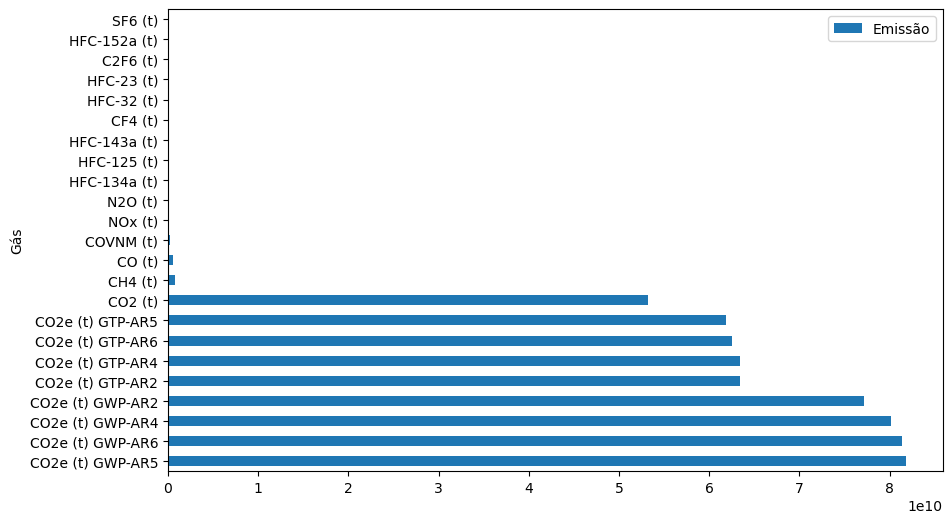

In [26]:
valor_emissoes_por_gas.plot(kind='barh', figsize=(10,6))


In [27]:
percentual_co2 = float((valor_emissoes_por_gas.iloc[0:9].sum() / valor_emissoes_por_gas.sum()).iloc[0]) * 100


In [28]:
print(f'A emissão de CO2 corresponde a {percentual_co2:.2f}% de emissão total de gases estufa no Brasil de 1970 a 2021')


A emissão de CO2 corresponde a 99.74% de emissão total de gases estufa no Brasil de 1970 a 2021


### Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

In [29]:
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor


Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

Para descobrir o setor que emite a maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do método *cross-section* [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), extraindo a partir disso o valor máximo e índice máximo com os métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) e [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax).

In [30]:
gas_por_setor.xs('CO2 (t)', level=0)
# Da mesmo forma podemos usar o codigo abaixo:
gas_por_setor.loc['CO2 (t)']
# Pois ele vai retornar o valor para o level 0 do indice (primeiro index)


,Emissão
Nível 1 - Setor,
Agropecuária,5.411750e+08
Energia,1.261352e+10
Mudança de Uso da Terra e Floresta,3.733930e+10
Processos Industriais,2.729603e+09
Resíduos,2.276264e+07


In [31]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level=(0, 1))
# Da mesmo forma podemos usar o codigo abaixo:
gas_por_setor.loc[[('CO2 (t)', 'Mudança de Uso da Terra e Floresta')]]
# Pois vai se basear na tupla para definir os indices do DataFrame multi index


,,Emissão
Gás,Nível 1 - Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,3.733930e+10


In [32]:
gas_por_setor.xs('CO2 (t)', level=0).max()


Emissão    3.733930e+10
dtype: float64

In [33]:
gas_por_setor.xs('CO2 (t)', level=0).idxmax()


Emissão    Mudança de Uso da Terra e Floresta
dtype: object

Para evitar uma forma manual para cada tipo de gás, podemos explorar ainda mais o método `groupby()` em conjunto com o [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

In [34]:
gas_por_setor.groupby(level=0).idxmax()


,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


Por fim, podemos criar uma tabela sumarizada com as informações dos valores máximos de emissão para cada tipo de gás e com a referência do setor com maior emissão de cada gás.

In [35]:
gas_por_setor.groupby(level=0).max()


,Emissão
Gás,
C2F6 (t),5.765018e+02
CF4 (t),7.135481e+03
CH4 (t),5.928481e+08
CO (t),3.959769e+08
CO2 (t),3.733930e+10
CO2e (t) GTP-AR2,3.850044e+10
CO2e (t) GTP-AR4,3.850044e+10
CO2e (t) GTP-AR5,3.831675e+10
CO2e (t) GTP-AR6,3.843359e+10


In [36]:
values_max = gas_por_setor.groupby(level=0).max().values
values_max


array([[5.76501774e+02],
       [7.13548128e+03],
       [5.92848132e+08],
       [3.95976946e+08],
       [3.73393003e+10],
       [3.85004383e+10],
       [3.85004383e+10],
       [3.83167456e+10],
       [3.84335874e+10],
       [3.99942414e+10],
       [4.03083713e+10],
       [4.05152299e+10],
       [4.04921633e+10],
       [1.60862332e+08],
       [9.79558000e+03],
       [1.39473100e+05],
       [9.03940000e+03],
       [5.70600000e+02],
       [1.19784000e+03],
       [2.36775000e+03],
       [1.77470246e+07],
       [9.36121468e+07],
       [4.70580000e+02]])

In [37]:
tabela_sumarizada = gas_por_setor.groupby(level=0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão', values_max)
tabela_sumarizada


,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


Podemos alterar a ordem dos níveis de índice para encontrar a outra informação, que nos diz qual o gás mais emitido para cada tipo de setor. Para isso, vamos utilizar o método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

In [38]:
gas_por_setor.swaplevel(0, 1)


Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [39]:
gas_por_setor.swaplevel(0, 1).groupby(level=0).idxmax()


,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


### Emissão ao longo dos anos

Vamos identificar se as emissões de gases estufas aumentaram ou diminuíram ao longo dos anos e visualizar essa variação para cada tipo de gás emitido separadamente.

In [40]:
emissoes_por_ano


,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


<Axes: xlabel='Ano'>

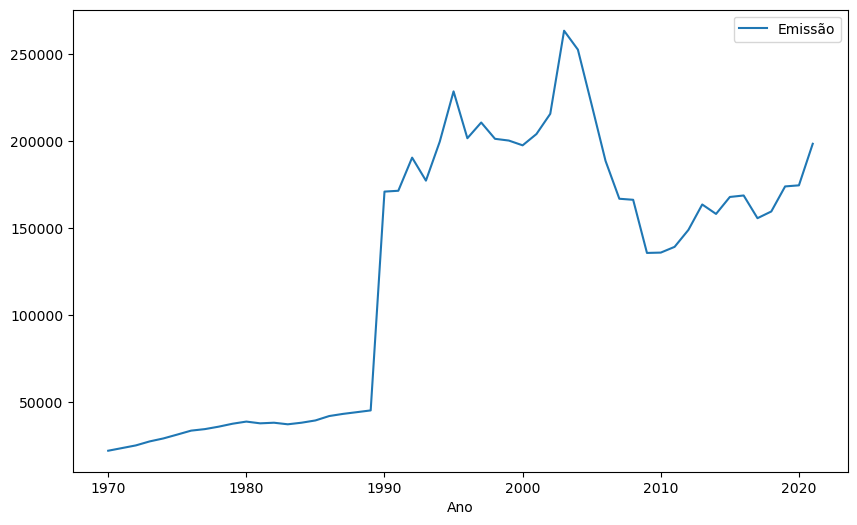

In [41]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(figsize=(10, 6))


In [42]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax()


Emissão    2003
dtype: int64

In [43]:
emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean()


Emissão
Ano  Gás                     
1970 C2F6 (t)        0.232610
     CF4 (t)         3.557421
     CH4 (t)      1471.024024
     CO (t)       2155.556658
     CO2 (t)     19244.913199
...                       ...
2021 HFC-23 (t)      0.000000
     HFC-32 (t)    261.100000
     N2O (t)       119.295311
     NOx (t)       679.395431
     SF6 (t)         5.240000

[1196 rows x 1 columns]

In [44]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual


,Ano,Gás,Emissão
0,1970,C2F6 (t),0.232610
1,1970,CF4 (t),3.557421
2,1970,CH4 (t),1471.024024
3,1970,CO (t),2155.556658
4,1970,CO2 (t),19244.913199
...,...,...,...
1191,2021,HFC-23 (t),0.000000
1192,2021,HFC-32 (t),261.100000
1193,2021,N2O (t),119.295311
1194,2021,NOx (t),679.395431


In [45]:
media_emissao_anual = media_emissao_anual.pivot_table(index='Ano', columns='Gás', values='Emissão')
media_emissao_anual


Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


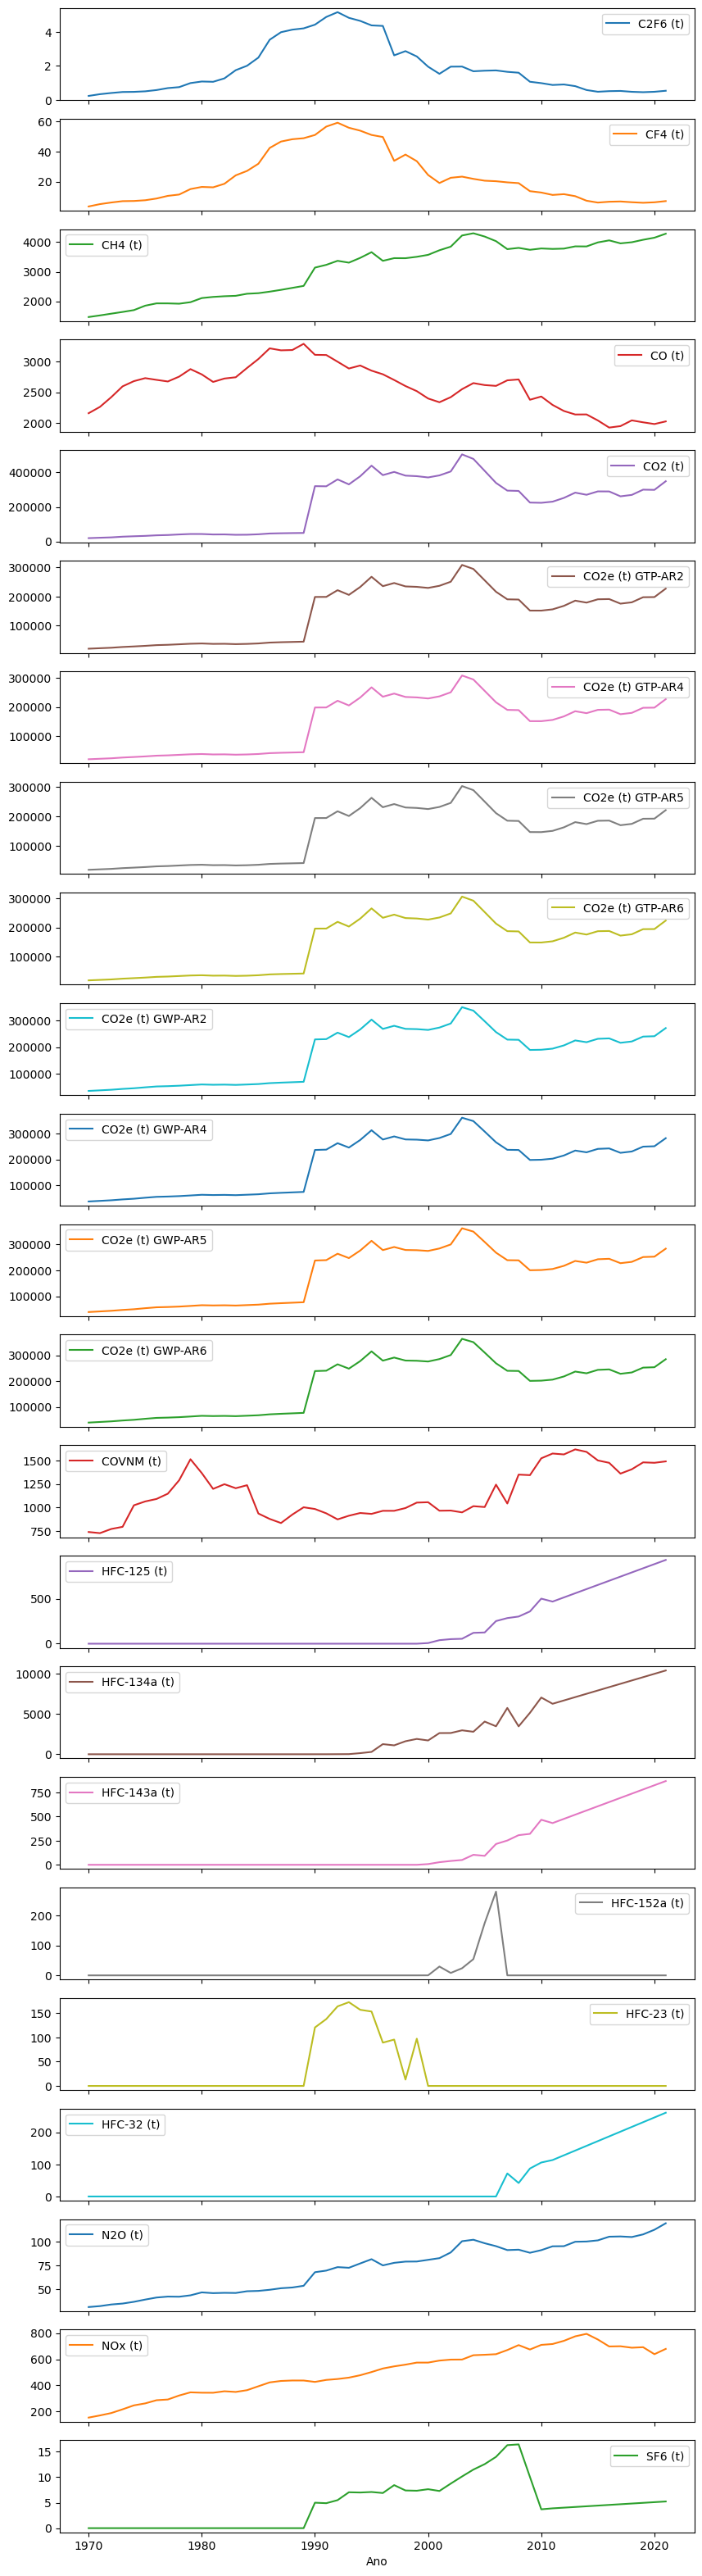

In [46]:
media_emissao_anual.plot(subplots=True, figsize=(10, 40));


### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [48]:
path = 'in/POP2022_Municipios.xls'

populacao = pd.read_excel(path, header=1, skipfooter=34)
populacao


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [51]:
try:
    populacao.groupby('UF')[['POPULAÇÃO']].sum()
except TypeError as e:
    print(e)


unsupported operand type(s) for +: 'int' and 'str'


Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [52]:
try:
    populacao['POPULAÇÃO'].astype('int')
except ValueError as e:
    print(e)


invalid literal for int() with base 10: '461.748(1)'


In [66]:
populacao[populacao['POPULAÇÃO'].str.contains(r'\(', na=False)]


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [80]:
populacao = populacao.assign(
    populacao_sem_parenteses = populacao['POPULAÇÃO'].replace(r'\(\d{1,2}\)', '', regex=True),
    # no caso abaixo precisamos usar lambda pq a coluna que queremos esta sendo criada acima
    populacao = lambda x : x.loc[:, 'populacao_sem_parenteses'].replace(r'\.', '', regex=True),
)


In [81]:
populacao[populacao['POPULAÇÃO'].str.contains(r'\(', na=False)]


,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [90]:
populacao = populacao.astype({'populacao': 'int64'})


In [94]:
populacao_estados = populacao.groupby('UF')[['populacao']].sum().reset_index()
populacao_estados


,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [98]:
emissoes_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()
emissoes_estados


,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [101]:
dados_por_estado = emissoes_estados.merge(populacao_estados, left_on='Estado', right_on='UF')
dados_por_estado


,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

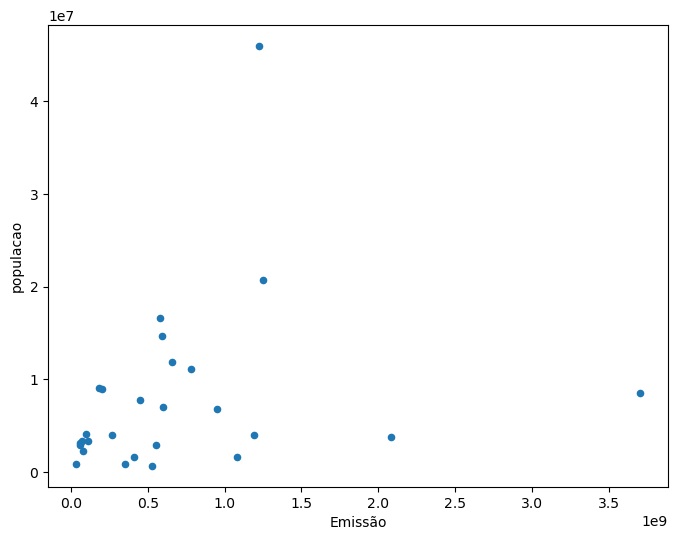

In [106]:
dados_por_estado.plot(kind='scatter', x='Emissão', y='populacao', figsize=(8,6));


Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [107]:
import plotly.express as px


In [110]:
px.scatter(dados_por_estado, x='populacao', y='Emissão', text='Estado', opacity=0)


Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [116]:
dados_por_estado['Emissão per capita'] = dados_por_estado['Emissão']/dados_por_estado['populacao']
dados_por_estado.sort_values('Emissão per capita', ascending=False, inplace=True)


In [117]:
px.bar(dados_por_estado, x='Estado', y='Emissão per capita')


In [118]:
px.scatter(dados_por_estado, x='populacao', y='Emissão', text='Estado', size='Emissão per capita')
